## Libraries 

In [3]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#plt.figure(figsize=(16,10))

In [5]:
import json

In [6]:
from sklearn import preprocessing

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import  AdaBoostClassifier
#!pip install lightgbm
import lightgbm as lgb

In [9]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.models import Model
from pathlib import Path

In [10]:
from keras.optimizers import Adam
from livelossplot.inputs.keras import PlotLossesCallback
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model

In [11]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.layers import LeakyReLU

In [12]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [13]:
from sklearn.model_selection import cross_val_score, cross_validate ,cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

---------------

## Functions

In [12]:
def checkBalance(dataset,target_name):
    print("=======================================")
    print(f"Target Name : {target_name}")
    print("=======================================")
    print("value count")
    print(dataset[target_name].value_counts())
    print("=======================================")
    sns.histplot(x =target_name,data = dataset)
    plt.show()

In [13]:
def check_unique(dataframe,feature_name,target_name):
    # get a list of the unique values 
    uniqueLst = list(dataframe[feature_name].unique())
    # the length of the unique values 
    uniquelength = len(uniqueLst)
    # count the appenrance of each value in the dataset 
    count = dataframe[feature_name].value_counts()
    sorted_count = count.sort_values() 
    # print some information about the feature 
    print(f"Feature : {feature_name}")
    print(f"Number of unique values : {uniquelength}")
    print("=================================")
    print("(Attack'category,count)")
    print(sorted_count)
    print("=================================")
    #sns.histplot(data=, x=feature_name,hue="label", kde=True)
    sns.displot(x =feature_name,hue=target_name,data = dataframe, kind="kde", multiple="stack")
    plt.show()

In [14]:
def count_number_word(lst_of_lst):
    
    wv_lens =[]

    for x in lst_of_lst:
         wv_lens.append(len(x))

    myset = set(wv_lens)

    counts = [wv_lens.count(x)for x in myset]

    df2 = pd.DataFrame({
        "number of words":list(myset),
        "count":counts
    })
    
    return df2


In [15]:
def padd_zeros(row,n_words):
    # get number of words in this row
    length = len(row)
    # create new list that contain the value of the new length 
    new_lst = []
    
    for i in range(n_words):
        if i < length:
            new_lst.append(row[i])
        else:
    
            listofzeros = [0]*100
            new_lst.append(list(listofzeros))   
        
        
    row = new_lst
    
    return row

In [16]:
def prepare_equalWords_data(data,n_words):
    # create a new data frame 
    nemDF = data.copy()
    # pad zeros 
    nemDF['word_vector'] = nemDF['word_vector'].apply(lambda row: padd_zeros(row,n_words)) 
    # recount again 
    nemDF['word_count']  = nemDF['word_vector'].apply(lambda x: len(x))    
    # encode the label to be 0 and 1 instead 1 and 2 
    nemDF['label']  = nemDF['label'].apply(lambda x: int(x-1))    
    
    return nemDF

In [17]:
def visualize_class(data,y):
    plt.figure(figsize=(20,20))
    
    s= [v== y for v in data['label']]
    idxs = np.flatnonzero(s)
    idxs = np.random.choice(idxs, 5, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(1,5, i+1)
        plt.imshow(data['word_vector'][idx])
        plt.axis('off')
        plt.title(y)
    plt.show()
            
def visualize_classes(data,classes):
    for y in classes:
        visualize_class(data,y)
    

In [18]:
def normalize_lst(a):
    lst = np.array(a).reshape(-1,1)
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    normalizedlist=scaler.fit_transform(lst)
    return normalizedlist

In [19]:
def get_words(data_frame,n_words):    
    new_x=[]

    for i in range(len(data_frame)):
            templist= np.array([]) 
            np_word = np.array(data_frame['word_vector'][i])
            templist= np.append(templist,np_word[:n_words])
            
            if(np_word.shape[0] <  n_words):
                numeToAdd = n_words - np_word.shape[0]
                templist= np.append(templist, np.zeros(100*numeToAdd))
            
            templist=templist.tolist()
            new_x.append(templist) 

    return new_x

In [20]:
import keras.backend as K
def F1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [21]:
def plot_report_confusionMatrix(y_pred,y_true):
    cm = confusion_matrix(y_true,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred))
    plot_report_confusionMatrix(y_pred,y_true)
    print("==============================================================")
    return f1_score(y_true, y_pred) 

def apply_CV_F1(model,X,y):

    # Nested CV with parameter optimization
    nested_score = cross_val_score(model, X, y, cv=5,scoring=make_scorer(classification_report_with_accuracy_score))
    print("==============================================================")
    print(f"the f1-score in all iterations       : {nested_score}")
    print(f"the mean of f1-scores                : {nested_score.mean()}")
    print(f"the std  of f1-scores                : {nested_score.std()}")
    print("==============================================================")
    return nested_score.mean() , nested_score.std(),nested_score

--------------

### read the data 

In [22]:
data5_2 = pd.read_csv("data10.csv")
data5_2['word_vector'] = [json.loads(x) for x in data5_2['word_vector']] # list of lists 

In [23]:
data5_2.head()

,Unnamed: 0,category,word_vector,label,word_count
0,0,24,"[[-0.507, -0.49518, 0.46885, 0.54524, -0.11552...",1,10
1,1,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",0,10
2,2,24,"[[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842...",0,10
3,3,21,"[[-0.44257, -0.54624, 0.25403, 0.80731, 1.026,...",0,10
4,4,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1,10


### make each row as only one list instead of list of lists 

In [24]:
X_oneLstPerRow = get_words(data5_2,10)

In [25]:
len(X_oneLstPerRow)

123040

### split the data 

In [26]:
y = data5_2['label']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_oneLstPerRow, y, test_size=0.2,stratify=y, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,stratify=y_train, random_state=1) 

In [28]:
pd.DataFrame(y_train).value_counts()

label
0        36912
1        36912
dtype: int64

In [29]:
pd.DataFrame(y_val).value_counts()

label
0        12304
1        12304
dtype: int64

In [30]:
pd.DataFrame(y_test).value_counts()

label
0        12304
1        12304
dtype: int64

<h3 style="color:maroon;"> Normalize each word to be in 0 to 1 scale </h3>

In [31]:
#lst = np.array().reshape(-1,1)
scaler  = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

### Reshape the data so it can be used as images 

--------

<h2 style="color:rgb(74, 70, 11);">Part 0</h2>

<h3 style="color:maroon;">BaseLine model</h3>

### Models 

In [32]:
# dicision_tree
decTree_CLF = DecisionTreeClassifier(random_state=0)
# XG_boost
xgb_CLF = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
# random_forest
rf_CLF = RandomForestClassifier(n_estimators=100, random_state=0)
# AdaBoost
ada_CLF = AdaBoostClassifier(n_estimators=100,random_state=0)
# HistGradientBoostingClassifier
gradiant_boost_CLF =  HistGradientBoostingClassifier(random_state=0)
# CatBoostClassifier
catBoost_CLF = CatBoostClassifier(random_state=0)
# LGBMClassifier
lightGBM_CLF = lgb.LGBMClassifier(random_state=0)

In [33]:
components=[5,10,20,30,50]
models = [decTree_CLF ,xgb_CLF ,rf_CLF ,ada_CLF ,gradiant_boost_CLF ,catBoost_CLF ,lightGBM_CLF]
models_names = ['dicision_tree','XG_boost','random_forest','AdaBoost','HistGradientBoostingClassifier','CatBoostClassifier','LGBMClassifier']
f1_scores = []
combinations = []
def get_f1_score_4_PCA(X_tr,y_tr,X_val,y_val,model):
    clf =model.fit(X_tr, y_tr)
    pred=clf.predict(X_val)
    f1_score_value = f1_score(pred, y_val) 
    return f1_score_value

for i in components:
    # create instance from PCA 
    pca = PCA(n_components=i,random_state=0)
    
    # fit PCA 
    X_train_pca =pca.fit_transform(X_train)
    X_val_pca   =pca.transform(X_val)
    
    for j, m in enumerate(models): 
        f1_score_value = get_f1_score_4_PCA(X_train_pca,y_train,X_val_pca,y_val,m)
        f1_scores.append(f1_score_value)
        st = f"{models_names[j]} , C:{i}"
        print(f"{models_names[j]} ,f1: {f1_score_value:.3f}, C:{i}")
        combinations.append(st)
    

dicision_tree ,f1: 0.731, C:5
XG_boost ,f1: 0.733, C:5
random_forest ,f1: 0.735, C:5
AdaBoost ,f1: 0.708, C:5
HistGradientBoostingClassifier ,f1: 0.652, C:5
Learning rate set to 0.064663
0:	learn: 0.6428658	total: 198ms	remaining: 3m 17s
1:	learn: 0.6019456	total: 224ms	remaining: 1m 51s
2:	learn: 0.5732335	total: 238ms	remaining: 1m 19s
3:	learn: 0.5474763	total: 248ms	remaining: 1m 1s
4:	learn: 0.5267434	total: 256ms	remaining: 50.9s
5:	learn: 0.5112479	total: 263ms	remaining: 43.6s
6:	learn: 0.4974000	total: 270ms	remaining: 38.3s
7:	learn: 0.4872160	total: 277ms	remaining: 34.4s
8:	learn: 0.4778825	total: 285ms	remaining: 31.3s
9:	learn: 0.4691555	total: 291ms	remaining: 28.8s
10:	learn: 0.4618730	total: 298ms	remaining: 26.8s
11:	learn: 0.4545771	total: 305ms	remaining: 25.1s
12:	learn: 0.4501765	total: 312ms	remaining: 23.7s
13:	learn: 0.4454225	total: 319ms	remaining: 22.4s
14:	learn: 0.4412728	total: 325ms	remaining: 21.4s
15:	learn: 0.4352598	total: 332ms	remaining: 20.4s
16:	

177:	learn: 0.3465155	total: 1.6s	remaining: 7.39s
178:	learn: 0.3463339	total: 1.61s	remaining: 7.38s
179:	learn: 0.3462570	total: 1.62s	remaining: 7.37s
180:	learn: 0.3461136	total: 1.63s	remaining: 7.36s
181:	learn: 0.3460360	total: 1.63s	remaining: 7.34s
182:	learn: 0.3459658	total: 1.64s	remaining: 7.32s
183:	learn: 0.3459126	total: 1.65s	remaining: 7.31s
184:	learn: 0.3457896	total: 1.66s	remaining: 7.3s
185:	learn: 0.3456186	total: 1.66s	remaining: 7.28s
186:	learn: 0.3455257	total: 1.67s	remaining: 7.27s
187:	learn: 0.3454547	total: 1.68s	remaining: 7.26s
188:	learn: 0.3453887	total: 1.69s	remaining: 7.24s
189:	learn: 0.3452911	total: 1.7s	remaining: 7.23s
190:	learn: 0.3451509	total: 1.7s	remaining: 7.21s
191:	learn: 0.3450562	total: 1.71s	remaining: 7.2s
192:	learn: 0.3450067	total: 1.72s	remaining: 7.19s
193:	learn: 0.3448534	total: 1.73s	remaining: 7.18s
194:	learn: 0.3447878	total: 1.73s	remaining: 7.16s
195:	learn: 0.3446412	total: 1.74s	remaining: 7.15s
196:	learn: 0.344

346:	learn: 0.3341436	total: 2.89s	remaining: 5.43s
347:	learn: 0.3340880	total: 2.9s	remaining: 5.42s
348:	learn: 0.3340474	total: 2.91s	remaining: 5.44s
349:	learn: 0.3340246	total: 2.93s	remaining: 5.43s
350:	learn: 0.3339912	total: 2.94s	remaining: 5.43s
351:	learn: 0.3339757	total: 2.94s	remaining: 5.42s
352:	learn: 0.3339535	total: 2.95s	remaining: 5.41s
353:	learn: 0.3339026	total: 2.96s	remaining: 5.41s
354:	learn: 0.3338675	total: 2.97s	remaining: 5.4s
355:	learn: 0.3338070	total: 2.98s	remaining: 5.39s
356:	learn: 0.3337646	total: 2.99s	remaining: 5.38s
357:	learn: 0.3337167	total: 3s	remaining: 5.38s
358:	learn: 0.3336294	total: 3.01s	remaining: 5.37s
359:	learn: 0.3335620	total: 3.02s	remaining: 5.36s
360:	learn: 0.3335459	total: 3.02s	remaining: 5.35s
361:	learn: 0.3334423	total: 3.03s	remaining: 5.34s
362:	learn: 0.3333658	total: 3.04s	remaining: 5.33s
363:	learn: 0.3333001	total: 3.05s	remaining: 5.32s
364:	learn: 0.3332441	total: 3.05s	remaining: 5.31s
365:	learn: 0.333

519:	learn: 0.3275464	total: 4.21s	remaining: 3.89s
520:	learn: 0.3275152	total: 4.22s	remaining: 3.88s
521:	learn: 0.3274945	total: 4.23s	remaining: 3.87s
522:	learn: 0.3274629	total: 4.24s	remaining: 3.87s
523:	learn: 0.3274481	total: 4.25s	remaining: 3.86s
524:	learn: 0.3273969	total: 4.25s	remaining: 3.85s
525:	learn: 0.3273925	total: 4.26s	remaining: 3.84s
526:	learn: 0.3273613	total: 4.27s	remaining: 3.83s
527:	learn: 0.3273180	total: 4.28s	remaining: 3.82s
528:	learn: 0.3273049	total: 4.28s	remaining: 3.81s
529:	learn: 0.3272716	total: 4.29s	remaining: 3.81s
530:	learn: 0.3272555	total: 4.3s	remaining: 3.8s
531:	learn: 0.3272225	total: 4.31s	remaining: 3.79s
532:	learn: 0.3272076	total: 4.32s	remaining: 3.78s
533:	learn: 0.3271970	total: 4.32s	remaining: 3.77s
534:	learn: 0.3271830	total: 4.33s	remaining: 3.76s
535:	learn: 0.3271604	total: 4.34s	remaining: 3.76s
536:	learn: 0.3271208	total: 4.35s	remaining: 3.75s
537:	learn: 0.3270984	total: 4.35s	remaining: 3.74s
538:	learn: 0.

683:	learn: 0.3235268	total: 5.53s	remaining: 2.56s
684:	learn: 0.3235127	total: 5.54s	remaining: 2.55s
685:	learn: 0.3234823	total: 5.55s	remaining: 2.54s
686:	learn: 0.3234744	total: 5.56s	remaining: 2.53s
687:	learn: 0.3234425	total: 5.56s	remaining: 2.52s
688:	learn: 0.3234382	total: 5.57s	remaining: 2.51s
689:	learn: 0.3234175	total: 5.58s	remaining: 2.51s
690:	learn: 0.3233887	total: 5.58s	remaining: 2.5s
691:	learn: 0.3233746	total: 5.59s	remaining: 2.49s
692:	learn: 0.3233528	total: 5.6s	remaining: 2.48s
693:	learn: 0.3233030	total: 5.61s	remaining: 2.47s
694:	learn: 0.3232623	total: 5.61s	remaining: 2.46s
695:	learn: 0.3232444	total: 5.62s	remaining: 2.46s
696:	learn: 0.3232163	total: 5.63s	remaining: 2.45s
697:	learn: 0.3232043	total: 5.63s	remaining: 2.44s
698:	learn: 0.3231813	total: 5.64s	remaining: 2.43s
699:	learn: 0.3231635	total: 5.65s	remaining: 2.42s
700:	learn: 0.3231235	total: 5.66s	remaining: 2.41s
701:	learn: 0.3231073	total: 5.66s	remaining: 2.4s
702:	learn: 0.3

866:	learn: 0.3199789	total: 6.85s	remaining: 1.05s
867:	learn: 0.3199744	total: 6.86s	remaining: 1.04s
868:	learn: 0.3199603	total: 6.87s	remaining: 1.03s
869:	learn: 0.3199521	total: 6.88s	remaining: 1.03s
870:	learn: 0.3199497	total: 6.89s	remaining: 1.02s
871:	learn: 0.3199403	total: 6.89s	remaining: 1.01s
872:	learn: 0.3199341	total: 6.9s	remaining: 1s
873:	learn: 0.3199105	total: 6.91s	remaining: 996ms
874:	learn: 0.3198938	total: 6.92s	remaining: 988ms
875:	learn: 0.3198839	total: 6.92s	remaining: 980ms
876:	learn: 0.3198650	total: 6.93s	remaining: 972ms
877:	learn: 0.3198440	total: 6.94s	remaining: 964ms
878:	learn: 0.3198199	total: 6.95s	remaining: 957ms
879:	learn: 0.3198243	total: 6.96s	remaining: 949ms
880:	learn: 0.3198130	total: 6.96s	remaining: 941ms
881:	learn: 0.3198034	total: 6.97s	remaining: 933ms
882:	learn: 0.3197888	total: 6.98s	remaining: 925ms
883:	learn: 0.3197652	total: 6.99s	remaining: 917ms
884:	learn: 0.3197413	total: 6.99s	remaining: 909ms
885:	learn: 0.31

23:	learn: 0.3907630	total: 224ms	remaining: 9.13s
24:	learn: 0.3888852	total: 233ms	remaining: 9.09s
25:	learn: 0.3870216	total: 241ms	remaining: 9.04s
26:	learn: 0.3851543	total: 249ms	remaining: 8.97s
27:	learn: 0.3831924	total: 257ms	remaining: 8.92s
28:	learn: 0.3819056	total: 266ms	remaining: 8.89s
29:	learn: 0.3808603	total: 273ms	remaining: 8.84s
30:	learn: 0.3796071	total: 281ms	remaining: 8.78s
31:	learn: 0.3781108	total: 288ms	remaining: 8.72s
32:	learn: 0.3766928	total: 296ms	remaining: 8.67s
33:	learn: 0.3758172	total: 304ms	remaining: 8.63s
34:	learn: 0.3750225	total: 312ms	remaining: 8.59s
35:	learn: 0.3741632	total: 319ms	remaining: 8.55s
36:	learn: 0.3734855	total: 327ms	remaining: 8.52s
37:	learn: 0.3721799	total: 335ms	remaining: 8.48s
38:	learn: 0.3713458	total: 342ms	remaining: 8.44s
39:	learn: 0.3701445	total: 350ms	remaining: 8.4s
40:	learn: 0.3695535	total: 358ms	remaining: 8.38s
41:	learn: 0.3691128	total: 367ms	remaining: 8.36s
42:	learn: 0.3681373	total: 374m

192:	learn: 0.3341791	total: 1.57s	remaining: 6.57s
193:	learn: 0.3340914	total: 1.58s	remaining: 6.57s
194:	learn: 0.3340117	total: 1.59s	remaining: 6.56s
195:	learn: 0.3339080	total: 1.6s	remaining: 6.55s
196:	learn: 0.3338285	total: 1.6s	remaining: 6.54s
197:	learn: 0.3336850	total: 1.61s	remaining: 6.54s
198:	learn: 0.3336361	total: 1.62s	remaining: 6.52s
199:	learn: 0.3335621	total: 1.63s	remaining: 6.51s
200:	learn: 0.3335132	total: 1.64s	remaining: 6.51s
201:	learn: 0.3334444	total: 1.64s	remaining: 6.5s
202:	learn: 0.3333427	total: 1.65s	remaining: 6.49s
203:	learn: 0.3332763	total: 1.66s	remaining: 6.48s
204:	learn: 0.3332274	total: 1.67s	remaining: 6.47s
205:	learn: 0.3330795	total: 1.68s	remaining: 6.47s
206:	learn: 0.3329665	total: 1.69s	remaining: 6.46s
207:	learn: 0.3329405	total: 1.7s	remaining: 6.46s
208:	learn: 0.3328855	total: 1.7s	remaining: 6.45s
209:	learn: 0.3328118	total: 1.71s	remaining: 6.44s
210:	learn: 0.3327721	total: 1.72s	remaining: 6.42s
211:	learn: 0.332

363:	learn: 0.3238316	total: 2.94s	remaining: 5.14s
364:	learn: 0.3237974	total: 2.95s	remaining: 5.13s
365:	learn: 0.3237454	total: 2.96s	remaining: 5.13s
366:	learn: 0.3237145	total: 2.97s	remaining: 5.12s
367:	learn: 0.3236602	total: 2.98s	remaining: 5.11s
368:	learn: 0.3236199	total: 2.98s	remaining: 5.1s
369:	learn: 0.3235808	total: 2.99s	remaining: 5.09s
370:	learn: 0.3235386	total: 3s	remaining: 5.08s
371:	learn: 0.3234897	total: 3.01s	remaining: 5.08s
372:	learn: 0.3234594	total: 3.01s	remaining: 5.07s
373:	learn: 0.3234266	total: 3.02s	remaining: 5.06s
374:	learn: 0.3233876	total: 3.03s	remaining: 5.05s
375:	learn: 0.3233458	total: 3.04s	remaining: 5.04s
376:	learn: 0.3233102	total: 3.04s	remaining: 5.03s
377:	learn: 0.3232636	total: 3.05s	remaining: 5.02s
378:	learn: 0.3232164	total: 3.06s	remaining: 5.02s
379:	learn: 0.3231679	total: 3.07s	remaining: 5.01s
380:	learn: 0.3231331	total: 3.08s	remaining: 5.01s
381:	learn: 0.3230992	total: 3.09s	remaining: 5s
382:	learn: 0.32307

524:	learn: 0.3188867	total: 4.28s	remaining: 3.88s
525:	learn: 0.3188690	total: 4.29s	remaining: 3.87s
526:	learn: 0.3188535	total: 4.3s	remaining: 3.86s
527:	learn: 0.3188318	total: 4.31s	remaining: 3.85s
528:	learn: 0.3188197	total: 4.32s	remaining: 3.84s
529:	learn: 0.3188022	total: 4.32s	remaining: 3.83s
530:	learn: 0.3187824	total: 4.33s	remaining: 3.83s
531:	learn: 0.3187616	total: 4.34s	remaining: 3.82s
532:	learn: 0.3187520	total: 4.35s	remaining: 3.81s
533:	learn: 0.3187236	total: 4.36s	remaining: 3.8s
534:	learn: 0.3186997	total: 4.36s	remaining: 3.79s
535:	learn: 0.3186816	total: 4.37s	remaining: 3.78s
536:	learn: 0.3186664	total: 4.38s	remaining: 3.77s
537:	learn: 0.3186481	total: 4.39s	remaining: 3.77s
538:	learn: 0.3186210	total: 4.39s	remaining: 3.76s
539:	learn: 0.3185905	total: 4.4s	remaining: 3.75s
540:	learn: 0.3185529	total: 4.41s	remaining: 3.74s
541:	learn: 0.3185423	total: 4.42s	remaining: 3.73s
542:	learn: 0.3185104	total: 4.43s	remaining: 3.73s
543:	learn: 0.3

696:	learn: 0.3155280	total: 5.67s	remaining: 2.47s
697:	learn: 0.3155101	total: 5.68s	remaining: 2.46s
698:	learn: 0.3154953	total: 5.69s	remaining: 2.45s
699:	learn: 0.3154868	total: 5.7s	remaining: 2.44s
700:	learn: 0.3154669	total: 5.71s	remaining: 2.44s
701:	learn: 0.3154535	total: 5.72s	remaining: 2.43s
702:	learn: 0.3154396	total: 5.72s	remaining: 2.42s
703:	learn: 0.3154171	total: 5.73s	remaining: 2.41s
704:	learn: 0.3154094	total: 5.74s	remaining: 2.4s
705:	learn: 0.3153982	total: 5.75s	remaining: 2.39s
706:	learn: 0.3153687	total: 5.75s	remaining: 2.38s
707:	learn: 0.3153569	total: 5.76s	remaining: 2.38s
708:	learn: 0.3153481	total: 5.77s	remaining: 2.37s
709:	learn: 0.3153217	total: 5.78s	remaining: 2.36s
710:	learn: 0.3153065	total: 5.79s	remaining: 2.35s
711:	learn: 0.3152932	total: 5.8s	remaining: 2.34s
712:	learn: 0.3152817	total: 5.8s	remaining: 2.34s
713:	learn: 0.3152673	total: 5.81s	remaining: 2.33s
714:	learn: 0.3152530	total: 5.82s	remaining: 2.32s
715:	learn: 0.31

874:	learn: 0.3132605	total: 7.18s	remaining: 1.03s
875:	learn: 0.3132556	total: 7.19s	remaining: 1.02s
876:	learn: 0.3132396	total: 7.2s	remaining: 1.01s
877:	learn: 0.3132390	total: 7.21s	remaining: 1s
878:	learn: 0.3132303	total: 7.22s	remaining: 994ms
879:	learn: 0.3132222	total: 7.23s	remaining: 986ms
880:	learn: 0.3132124	total: 7.24s	remaining: 978ms
881:	learn: 0.3131965	total: 7.25s	remaining: 970ms
882:	learn: 0.3131843	total: 7.25s	remaining: 961ms
883:	learn: 0.3131746	total: 7.26s	remaining: 953ms
884:	learn: 0.3131788	total: 7.27s	remaining: 945ms
885:	learn: 0.3131643	total: 7.28s	remaining: 936ms
886:	learn: 0.3131576	total: 7.29s	remaining: 928ms
887:	learn: 0.3131425	total: 7.29s	remaining: 920ms
888:	learn: 0.3131318	total: 7.3s	remaining: 912ms
889:	learn: 0.3131233	total: 7.31s	remaining: 903ms
890:	learn: 0.3131145	total: 7.32s	remaining: 895ms
891:	learn: 0.3131123	total: 7.33s	remaining: 887ms
892:	learn: 0.3131007	total: 7.33s	remaining: 879ms
893:	learn: 0.313

34:	learn: 0.3642119	total: 335ms	remaining: 9.24s
35:	learn: 0.3629136	total: 345ms	remaining: 9.23s
36:	learn: 0.3624044	total: 353ms	remaining: 9.2s
37:	learn: 0.3616348	total: 363ms	remaining: 9.18s
38:	learn: 0.3609459	total: 372ms	remaining: 9.16s
39:	learn: 0.3604923	total: 381ms	remaining: 9.14s
40:	learn: 0.3595312	total: 390ms	remaining: 9.13s
41:	learn: 0.3589103	total: 399ms	remaining: 9.11s
42:	learn: 0.3584564	total: 409ms	remaining: 9.09s
43:	learn: 0.3579688	total: 430ms	remaining: 9.33s
44:	learn: 0.3570388	total: 443ms	remaining: 9.41s
45:	learn: 0.3565833	total: 454ms	remaining: 9.42s
46:	learn: 0.3561820	total: 464ms	remaining: 9.4s
47:	learn: 0.3556618	total: 473ms	remaining: 9.38s
48:	learn: 0.3550791	total: 482ms	remaining: 9.36s
49:	learn: 0.3545740	total: 492ms	remaining: 9.34s
50:	learn: 0.3539005	total: 501ms	remaining: 9.32s
51:	learn: 0.3535618	total: 510ms	remaining: 9.29s
52:	learn: 0.3531421	total: 521ms	remaining: 9.3s
53:	learn: 0.3524754	total: 530ms	

206:	learn: 0.3266614	total: 2.12s	remaining: 8.12s
207:	learn: 0.3266182	total: 2.13s	remaining: 8.11s
208:	learn: 0.3265306	total: 2.14s	remaining: 8.1s
209:	learn: 0.3264620	total: 2.15s	remaining: 8.08s
210:	learn: 0.3263860	total: 2.16s	remaining: 8.07s
211:	learn: 0.3263471	total: 2.17s	remaining: 8.05s
212:	learn: 0.3262831	total: 2.17s	remaining: 8.04s
213:	learn: 0.3262448	total: 2.19s	remaining: 8.03s
214:	learn: 0.3261288	total: 2.19s	remaining: 8.01s
215:	learn: 0.3260763	total: 2.2s	remaining: 8s
216:	learn: 0.3260329	total: 2.21s	remaining: 7.98s
217:	learn: 0.3259696	total: 2.22s	remaining: 7.97s
218:	learn: 0.3258891	total: 2.23s	remaining: 7.95s
219:	learn: 0.3258255	total: 2.24s	remaining: 7.94s
220:	learn: 0.3257260	total: 2.25s	remaining: 7.92s
221:	learn: 0.3256756	total: 2.26s	remaining: 7.91s
222:	learn: 0.3255953	total: 2.27s	remaining: 7.9s
223:	learn: 0.3255100	total: 2.27s	remaining: 7.88s
224:	learn: 0.3254063	total: 2.29s	remaining: 7.87s
225:	learn: 0.3253

375:	learn: 0.3182783	total: 3.7s	remaining: 6.15s
376:	learn: 0.3182570	total: 3.71s	remaining: 6.14s
377:	learn: 0.3182464	total: 3.72s	remaining: 6.13s
378:	learn: 0.3182158	total: 3.73s	remaining: 6.12s
379:	learn: 0.3181946	total: 3.74s	remaining: 6.11s
380:	learn: 0.3181618	total: 3.75s	remaining: 6.09s
381:	learn: 0.3181375	total: 3.76s	remaining: 6.08s
382:	learn: 0.3181260	total: 3.77s	remaining: 6.07s
383:	learn: 0.3180702	total: 3.78s	remaining: 6.06s
384:	learn: 0.3180457	total: 3.79s	remaining: 6.05s
385:	learn: 0.3180384	total: 3.79s	remaining: 6.04s
386:	learn: 0.3180198	total: 3.8s	remaining: 6.03s
387:	learn: 0.3180017	total: 3.81s	remaining: 6.01s
388:	learn: 0.3179562	total: 3.82s	remaining: 6s
389:	learn: 0.3179321	total: 3.83s	remaining: 5.99s
390:	learn: 0.3178897	total: 3.84s	remaining: 5.98s
391:	learn: 0.3178613	total: 3.85s	remaining: 5.97s
392:	learn: 0.3178315	total: 3.86s	remaining: 5.96s
393:	learn: 0.3177978	total: 3.87s	remaining: 5.95s
394:	learn: 0.317

545:	learn: 0.3143210	total: 5.3s	remaining: 4.41s
546:	learn: 0.3142982	total: 5.31s	remaining: 4.4s
547:	learn: 0.3142799	total: 5.32s	remaining: 4.39s
548:	learn: 0.3142707	total: 5.33s	remaining: 4.38s
549:	learn: 0.3142530	total: 5.34s	remaining: 4.37s
550:	learn: 0.3142269	total: 5.35s	remaining: 4.36s
551:	learn: 0.3142139	total: 5.35s	remaining: 4.35s
552:	learn: 0.3141837	total: 5.36s	remaining: 4.34s
553:	learn: 0.3141746	total: 5.37s	remaining: 4.33s
554:	learn: 0.3141651	total: 5.38s	remaining: 4.32s
555:	learn: 0.3141510	total: 5.39s	remaining: 4.31s
556:	learn: 0.3141384	total: 5.4s	remaining: 4.3s
557:	learn: 0.3141184	total: 5.41s	remaining: 4.29s
558:	learn: 0.3141004	total: 5.42s	remaining: 4.28s
559:	learn: 0.3140899	total: 5.43s	remaining: 4.27s
560:	learn: 0.3140830	total: 5.44s	remaining: 4.26s
561:	learn: 0.3140659	total: 5.45s	remaining: 4.25s
562:	learn: 0.3140476	total: 5.46s	remaining: 4.24s
563:	learn: 0.3140095	total: 5.47s	remaining: 4.23s
564:	learn: 0.31

721:	learn: 0.3118055	total: 7.07s	remaining: 2.72s
722:	learn: 0.3117846	total: 7.08s	remaining: 2.71s
723:	learn: 0.3117784	total: 7.08s	remaining: 2.7s
724:	learn: 0.3117672	total: 7.09s	remaining: 2.69s
725:	learn: 0.3117506	total: 7.1s	remaining: 2.68s
726:	learn: 0.3117364	total: 7.11s	remaining: 2.67s
727:	learn: 0.3117218	total: 7.12s	remaining: 2.66s
728:	learn: 0.3117157	total: 7.13s	remaining: 2.65s
729:	learn: 0.3116945	total: 7.14s	remaining: 2.64s
730:	learn: 0.3116737	total: 7.15s	remaining: 2.63s
731:	learn: 0.3116684	total: 7.16s	remaining: 2.62s
732:	learn: 0.3116600	total: 7.17s	remaining: 2.61s
733:	learn: 0.3116507	total: 7.18s	remaining: 2.6s
734:	learn: 0.3116405	total: 7.19s	remaining: 2.59s
735:	learn: 0.3116279	total: 7.2s	remaining: 2.58s
736:	learn: 0.3116108	total: 7.21s	remaining: 2.57s
737:	learn: 0.3116044	total: 7.22s	remaining: 2.56s
738:	learn: 0.3115985	total: 7.23s	remaining: 2.55s
739:	learn: 0.3115746	total: 7.24s	remaining: 2.54s
740:	learn: 0.31

894:	learn: 0.3101328	total: 8.69s	remaining: 1.02s
895:	learn: 0.3101250	total: 8.7s	remaining: 1.01s
896:	learn: 0.3101208	total: 8.71s	remaining: 1000ms
897:	learn: 0.3101144	total: 8.72s	remaining: 990ms
898:	learn: 0.3101102	total: 8.73s	remaining: 981ms
899:	learn: 0.3100951	total: 8.74s	remaining: 971ms
900:	learn: 0.3100873	total: 8.75s	remaining: 961ms
901:	learn: 0.3100855	total: 8.76s	remaining: 951ms
902:	learn: 0.3100774	total: 8.76s	remaining: 941ms
903:	learn: 0.3100563	total: 8.77s	remaining: 932ms
904:	learn: 0.3100502	total: 8.78s	remaining: 922ms
905:	learn: 0.3100450	total: 8.79s	remaining: 912ms
906:	learn: 0.3100451	total: 8.8s	remaining: 902ms
907:	learn: 0.3100365	total: 8.81s	remaining: 893ms
908:	learn: 0.3100265	total: 8.82s	remaining: 883ms
909:	learn: 0.3100202	total: 8.83s	remaining: 873ms
910:	learn: 0.3100138	total: 8.84s	remaining: 863ms
911:	learn: 0.3100080	total: 8.85s	remaining: 854ms
912:	learn: 0.3099995	total: 8.86s	remaining: 844ms
913:	learn: 0

49:	learn: 0.3512620	total: 529ms	remaining: 10s
50:	learn: 0.3509180	total: 539ms	remaining: 10s
51:	learn: 0.3503744	total: 550ms	remaining: 10s
52:	learn: 0.3498405	total: 559ms	remaining: 9.99s
53:	learn: 0.3493839	total: 569ms	remaining: 9.97s
54:	learn: 0.3490009	total: 579ms	remaining: 9.95s
55:	learn: 0.3487684	total: 589ms	remaining: 9.93s
56:	learn: 0.3483393	total: 599ms	remaining: 9.91s
57:	learn: 0.3475529	total: 610ms	remaining: 9.91s
58:	learn: 0.3471417	total: 620ms	remaining: 9.88s
59:	learn: 0.3467932	total: 630ms	remaining: 9.86s
60:	learn: 0.3464795	total: 640ms	remaining: 9.85s
61:	learn: 0.3461674	total: 650ms	remaining: 9.83s
62:	learn: 0.3456789	total: 660ms	remaining: 9.81s
63:	learn: 0.3452539	total: 670ms	remaining: 9.79s
64:	learn: 0.3449955	total: 680ms	remaining: 9.78s
65:	learn: 0.3446955	total: 691ms	remaining: 9.78s
66:	learn: 0.3443710	total: 703ms	remaining: 9.79s
67:	learn: 0.3441748	total: 715ms	remaining: 9.8s
68:	learn: 0.3438097	total: 726ms	rema

216:	learn: 0.3235541	total: 2.51s	remaining: 9.07s
217:	learn: 0.3235012	total: 2.53s	remaining: 9.06s
218:	learn: 0.3234698	total: 2.54s	remaining: 9.04s
219:	learn: 0.3234088	total: 2.55s	remaining: 9.03s
220:	learn: 0.3233329	total: 2.56s	remaining: 9.01s
221:	learn: 0.3232331	total: 2.57s	remaining: 8.99s
222:	learn: 0.3231432	total: 2.58s	remaining: 8.98s
223:	learn: 0.3230802	total: 2.59s	remaining: 8.96s
224:	learn: 0.3230261	total: 2.6s	remaining: 8.94s
225:	learn: 0.3229863	total: 2.61s	remaining: 8.93s
226:	learn: 0.3229263	total: 2.62s	remaining: 8.91s
227:	learn: 0.3228728	total: 2.63s	remaining: 8.9s
228:	learn: 0.3227860	total: 2.64s	remaining: 8.89s
229:	learn: 0.3227276	total: 2.65s	remaining: 8.88s
230:	learn: 0.3226553	total: 2.66s	remaining: 8.86s
231:	learn: 0.3226094	total: 2.67s	remaining: 8.85s
232:	learn: 0.3225378	total: 2.69s	remaining: 8.84s
233:	learn: 0.3225055	total: 2.7s	remaining: 8.83s
234:	learn: 0.3224335	total: 2.71s	remaining: 8.83s
235:	learn: 0.3

375:	learn: 0.3163195	total: 4.26s	remaining: 7.07s
376:	learn: 0.3162646	total: 4.27s	remaining: 7.05s
377:	learn: 0.3162461	total: 4.28s	remaining: 7.04s
378:	learn: 0.3162382	total: 4.29s	remaining: 7.03s
379:	learn: 0.3162243	total: 4.3s	remaining: 7.02s
380:	learn: 0.3161729	total: 4.31s	remaining: 7.01s
381:	learn: 0.3161539	total: 4.32s	remaining: 6.99s
382:	learn: 0.3161269	total: 4.33s	remaining: 6.98s
383:	learn: 0.3160747	total: 4.34s	remaining: 6.97s
384:	learn: 0.3160642	total: 4.35s	remaining: 6.95s
385:	learn: 0.3160436	total: 4.36s	remaining: 6.94s
386:	learn: 0.3160060	total: 4.37s	remaining: 6.93s
387:	learn: 0.3159710	total: 4.38s	remaining: 6.91s
388:	learn: 0.3159574	total: 4.39s	remaining: 6.9s
389:	learn: 0.3159263	total: 4.4s	remaining: 6.89s
390:	learn: 0.3158981	total: 4.41s	remaining: 6.87s
391:	learn: 0.3158660	total: 4.42s	remaining: 6.86s
392:	learn: 0.3158435	total: 4.43s	remaining: 6.85s
393:	learn: 0.3158257	total: 4.44s	remaining: 6.83s
394:	learn: 0.3

546:	learn: 0.3128559	total: 6.09s	remaining: 5.04s
547:	learn: 0.3128356	total: 6.1s	remaining: 5.03s
548:	learn: 0.3128185	total: 6.11s	remaining: 5.02s
549:	learn: 0.3128109	total: 6.12s	remaining: 5.01s
550:	learn: 0.3127939	total: 6.13s	remaining: 5s
551:	learn: 0.3127828	total: 6.14s	remaining: 4.99s
552:	learn: 0.3127735	total: 6.15s	remaining: 4.97s
553:	learn: 0.3127691	total: 6.16s	remaining: 4.96s
554:	learn: 0.3127620	total: 6.17s	remaining: 4.95s
555:	learn: 0.3127487	total: 6.18s	remaining: 4.94s
556:	learn: 0.3127335	total: 6.19s	remaining: 4.93s
557:	learn: 0.3127260	total: 6.2s	remaining: 4.91s
558:	learn: 0.3127110	total: 6.21s	remaining: 4.9s
559:	learn: 0.3127008	total: 6.22s	remaining: 4.89s
560:	learn: 0.3126738	total: 6.23s	remaining: 4.88s
561:	learn: 0.3126578	total: 6.24s	remaining: 4.87s
562:	learn: 0.3126362	total: 6.25s	remaining: 4.85s
563:	learn: 0.3126269	total: 6.26s	remaining: 4.84s
564:	learn: 0.3126109	total: 6.27s	remaining: 4.83s
565:	learn: 0.3126

712:	learn: 0.3108487	total: 7.85s	remaining: 3.16s
713:	learn: 0.3108374	total: 7.86s	remaining: 3.15s
714:	learn: 0.3108294	total: 7.88s	remaining: 3.14s
715:	learn: 0.3108216	total: 7.89s	remaining: 3.13s
716:	learn: 0.3108175	total: 7.9s	remaining: 3.12s
717:	learn: 0.3108063	total: 7.91s	remaining: 3.1s
718:	learn: 0.3107965	total: 7.92s	remaining: 3.09s
719:	learn: 0.3107762	total: 7.93s	remaining: 3.08s
720:	learn: 0.3107703	total: 7.94s	remaining: 3.07s
721:	learn: 0.3107655	total: 7.95s	remaining: 3.06s
722:	learn: 0.3107666	total: 7.96s	remaining: 3.05s
723:	learn: 0.3107629	total: 7.96s	remaining: 3.04s
724:	learn: 0.3107587	total: 7.97s	remaining: 3.02s
725:	learn: 0.3107450	total: 7.99s	remaining: 3.01s
726:	learn: 0.3107433	total: 8s	remaining: 3s
727:	learn: 0.3107234	total: 8.01s	remaining: 2.99s
728:	learn: 0.3107161	total: 8.02s	remaining: 2.98s
729:	learn: 0.3107133	total: 8.03s	remaining: 2.97s
730:	learn: 0.3107028	total: 8.03s	remaining: 2.96s
731:	learn: 0.310676

883:	learn: 0.3094262	total: 9.66s	remaining: 1.27s
884:	learn: 0.3094206	total: 9.67s	remaining: 1.26s
885:	learn: 0.3094119	total: 9.68s	remaining: 1.25s
886:	learn: 0.3094065	total: 9.69s	remaining: 1.24s
887:	learn: 0.3094028	total: 9.7s	remaining: 1.22s
888:	learn: 0.3093967	total: 9.71s	remaining: 1.21s
889:	learn: 0.3093933	total: 9.72s	remaining: 1.2s
890:	learn: 0.3093864	total: 9.74s	remaining: 1.19s
891:	learn: 0.3093744	total: 9.75s	remaining: 1.18s
892:	learn: 0.3093720	total: 9.76s	remaining: 1.17s
893:	learn: 0.3093657	total: 9.77s	remaining: 1.16s
894:	learn: 0.3093609	total: 9.78s	remaining: 1.15s
895:	learn: 0.3093537	total: 9.79s	remaining: 1.14s
896:	learn: 0.3093387	total: 9.8s	remaining: 1.13s
897:	learn: 0.3093267	total: 9.81s	remaining: 1.11s
898:	learn: 0.3093192	total: 9.82s	remaining: 1.1s
899:	learn: 0.3093086	total: 9.83s	remaining: 1.09s
900:	learn: 0.3093070	total: 9.84s	remaining: 1.08s
901:	learn: 0.3093028	total: 9.85s	remaining: 1.07s
902:	learn: 0.30

40:	learn: 0.3549549	total: 537ms	remaining: 12.5s
41:	learn: 0.3544777	total: 549ms	remaining: 12.5s
42:	learn: 0.3540065	total: 563ms	remaining: 12.5s
43:	learn: 0.3534163	total: 576ms	remaining: 12.5s
44:	learn: 0.3521781	total: 589ms	remaining: 12.5s
45:	learn: 0.3512437	total: 601ms	remaining: 12.5s
46:	learn: 0.3508197	total: 613ms	remaining: 12.4s
47:	learn: 0.3504573	total: 626ms	remaining: 12.4s
48:	learn: 0.3498114	total: 638ms	remaining: 12.4s
49:	learn: 0.3494600	total: 651ms	remaining: 12.4s
50:	learn: 0.3484780	total: 663ms	remaining: 12.3s
51:	learn: 0.3480878	total: 675ms	remaining: 12.3s
52:	learn: 0.3477698	total: 688ms	remaining: 12.3s
53:	learn: 0.3473433	total: 700ms	remaining: 12.3s
54:	learn: 0.3471168	total: 712ms	remaining: 12.2s
55:	learn: 0.3466693	total: 724ms	remaining: 12.2s
56:	learn: 0.3463335	total: 740ms	remaining: 12.2s
57:	learn: 0.3458510	total: 753ms	remaining: 12.2s
58:	learn: 0.3454137	total: 765ms	remaining: 12.2s
59:	learn: 0.3449467	total: 778

205:	learn: 0.3223730	total: 2.65s	remaining: 10.2s
206:	learn: 0.3222962	total: 2.66s	remaining: 10.2s
207:	learn: 0.3222202	total: 2.67s	remaining: 10.2s
208:	learn: 0.3221711	total: 2.69s	remaining: 10.2s
209:	learn: 0.3221058	total: 2.7s	remaining: 10.2s
210:	learn: 0.3220113	total: 2.71s	remaining: 10.1s
211:	learn: 0.3219227	total: 2.72s	remaining: 10.1s
212:	learn: 0.3217838	total: 2.74s	remaining: 10.1s
213:	learn: 0.3217493	total: 2.75s	remaining: 10.1s
214:	learn: 0.3217093	total: 2.76s	remaining: 10.1s
215:	learn: 0.3216653	total: 2.77s	remaining: 10.1s
216:	learn: 0.3216077	total: 2.78s	remaining: 10s
217:	learn: 0.3215663	total: 2.79s	remaining: 10s
218:	learn: 0.3214846	total: 2.81s	remaining: 10s
219:	learn: 0.3213780	total: 2.82s	remaining: 10s
220:	learn: 0.3213252	total: 2.83s	remaining: 9.98s
221:	learn: 0.3212401	total: 2.84s	remaining: 9.97s
222:	learn: 0.3212127	total: 2.86s	remaining: 9.96s
223:	learn: 0.3211107	total: 2.87s	remaining: 9.95s
224:	learn: 0.3210050

368:	learn: 0.3151244	total: 4.71s	remaining: 8.04s
369:	learn: 0.3151075	total: 4.72s	remaining: 8.03s
370:	learn: 0.3150463	total: 4.73s	remaining: 8.02s
371:	learn: 0.3150215	total: 4.74s	remaining: 8.01s
372:	learn: 0.3149778	total: 4.75s	remaining: 7.99s
373:	learn: 0.3149586	total: 4.78s	remaining: 8s
374:	learn: 0.3149478	total: 4.8s	remaining: 8s
375:	learn: 0.3149290	total: 4.81s	remaining: 7.98s
376:	learn: 0.3148997	total: 4.82s	remaining: 7.97s
377:	learn: 0.3148821	total: 4.83s	remaining: 7.96s
378:	learn: 0.3148546	total: 4.85s	remaining: 7.94s
379:	learn: 0.3148425	total: 4.86s	remaining: 7.93s
380:	learn: 0.3148241	total: 4.87s	remaining: 7.92s
381:	learn: 0.3147827	total: 4.89s	remaining: 7.91s
382:	learn: 0.3147636	total: 4.91s	remaining: 7.91s
383:	learn: 0.3147511	total: 4.92s	remaining: 7.9s
384:	learn: 0.3146804	total: 4.94s	remaining: 7.89s
385:	learn: 0.3146509	total: 4.95s	remaining: 7.88s
386:	learn: 0.3146095	total: 4.97s	remaining: 7.87s
387:	learn: 0.314601

534:	learn: 0.3117746	total: 6.96s	remaining: 6.05s
535:	learn: 0.3117560	total: 6.97s	remaining: 6.04s
536:	learn: 0.3117394	total: 6.99s	remaining: 6.03s
537:	learn: 0.3117082	total: 7s	remaining: 6.01s
538:	learn: 0.3116994	total: 7.02s	remaining: 6s
539:	learn: 0.3116938	total: 7.03s	remaining: 5.99s
540:	learn: 0.3116879	total: 7.04s	remaining: 5.97s
541:	learn: 0.3116720	total: 7.05s	remaining: 5.96s
542:	learn: 0.3116620	total: 7.07s	remaining: 5.95s
543:	learn: 0.3116517	total: 7.08s	remaining: 5.93s
544:	learn: 0.3116469	total: 7.09s	remaining: 5.92s
545:	learn: 0.3116357	total: 7.1s	remaining: 5.91s
546:	learn: 0.3116249	total: 7.12s	remaining: 5.89s
547:	learn: 0.3116065	total: 7.13s	remaining: 5.88s
548:	learn: 0.3115876	total: 7.14s	remaining: 5.87s
549:	learn: 0.3115718	total: 7.15s	remaining: 5.85s
550:	learn: 0.3115580	total: 7.17s	remaining: 5.84s
551:	learn: 0.3115472	total: 7.18s	remaining: 5.83s
552:	learn: 0.3115430	total: 7.2s	remaining: 5.82s
553:	learn: 0.311528

694:	learn: 0.3099835	total: 9.01s	remaining: 3.96s
695:	learn: 0.3099787	total: 9.03s	remaining: 3.94s
696:	learn: 0.3099574	total: 9.04s	remaining: 3.93s
697:	learn: 0.3099477	total: 9.05s	remaining: 3.92s
698:	learn: 0.3099341	total: 9.06s	remaining: 3.9s
699:	learn: 0.3099292	total: 9.08s	remaining: 3.89s
700:	learn: 0.3099260	total: 9.09s	remaining: 3.88s
701:	learn: 0.3099158	total: 9.1s	remaining: 3.86s
702:	learn: 0.3099055	total: 9.12s	remaining: 3.85s
703:	learn: 0.3098973	total: 9.13s	remaining: 3.84s
704:	learn: 0.3098871	total: 9.14s	remaining: 3.82s
705:	learn: 0.3098759	total: 9.15s	remaining: 3.81s
706:	learn: 0.3098669	total: 9.16s	remaining: 3.8s
707:	learn: 0.3098600	total: 9.18s	remaining: 3.79s
708:	learn: 0.3098449	total: 9.19s	remaining: 3.77s
709:	learn: 0.3098341	total: 9.21s	remaining: 3.76s
710:	learn: 0.3098079	total: 9.22s	remaining: 3.75s
711:	learn: 0.3097997	total: 9.23s	remaining: 3.73s
712:	learn: 0.3097969	total: 9.25s	remaining: 3.72s
713:	learn: 0.3

855:	learn: 0.3087016	total: 11.1s	remaining: 1.86s
856:	learn: 0.3086955	total: 11.1s	remaining: 1.85s
857:	learn: 0.3086891	total: 11.1s	remaining: 1.83s
858:	learn: 0.3086833	total: 11.1s	remaining: 1.82s
859:	learn: 0.3086745	total: 11.1s	remaining: 1.81s
860:	learn: 0.3086680	total: 11.1s	remaining: 1.79s
861:	learn: 0.3086609	total: 11.1s	remaining: 1.78s
862:	learn: 0.3086532	total: 11.1s	remaining: 1.77s
863:	learn: 0.3086544	total: 11.2s	remaining: 1.76s
864:	learn: 0.3086518	total: 11.2s	remaining: 1.74s
865:	learn: 0.3086487	total: 11.2s	remaining: 1.73s
866:	learn: 0.3086462	total: 11.2s	remaining: 1.72s
867:	learn: 0.3086422	total: 11.2s	remaining: 1.7s
868:	learn: 0.3086377	total: 11.2s	remaining: 1.69s
869:	learn: 0.3086344	total: 11.2s	remaining: 1.68s
870:	learn: 0.3086317	total: 11.2s	remaining: 1.67s
871:	learn: 0.3086234	total: 11.3s	remaining: 1.65s
872:	learn: 0.3086208	total: 11.3s	remaining: 1.64s
873:	learn: 0.3086207	total: 11.3s	remaining: 1.63s
874:	learn: 0

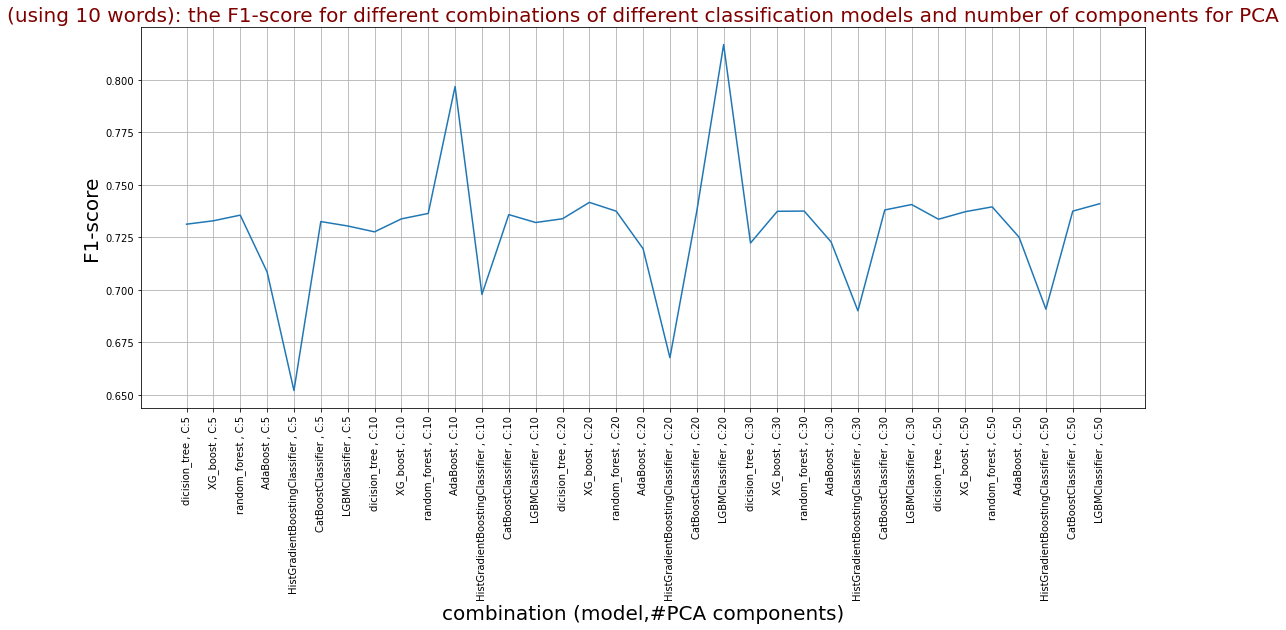

In [43]:
plt.figure(figsize=(18, 7))
plt.plot(combinations,f1_scores)
plt.grid()
plt.xticks(rotation=90) # rotate x-axis labels by 45 degrees.
plt.title("(using 10 words): the F1-score for different combinations of different classification models and number of components for PCA",fontsize=20,color="maroon")
plt.xlabel("combination (model,#PCA components)",fontsize=20)
plt.ylabel("F1-score",fontsize=20)

plt.show()

In [35]:
print("===================================================================")
print(f"Best number of components for PCA , and best model Based on F1-score : {combinations[np.argmax(f1_scores)]}")
print(f"F1-score : {f1_scores[np.argmax(f1_scores)]}")
print("===================================================================")


Best number of components for PCA , and best model Based on F1-score : LGBMClassifier , C:20
F1-score : 0.8167399979535455


--------

<h3 style="color:maroon;">Build the BaseLine model with the best parameters </h3>

In [37]:
# LGBMClassifier
BaseLine_model_10 = lgb.LGBMClassifier(random_state=0)

# create instance from PCA 
pca = PCA(n_components=20,random_state=0)

# fit PCA 
X_train_pca =pca.fit_transform(X_train)
X_val_pca   =pca.transform(X_val)
X_test_pca   =pca.transform(X_test)

# fit the baseline model on the train data 
BaseLine_model_10.fit(X_train_pca, y_train)

# get predictions 
pred=BaseLine_model_10.predict(X_val_pca)
baseLine_f1_score_value =  f1_score(pred, y_val) 

In [38]:
baseLine_f1_score_value

0.8167399979535455

### Check the performance of the model using a 5-fold cross validation 

              precision    recall  f1-score   support

           0       0.70      0.98      0.82      7383
           1       0.96      0.59      0.73      7382

    accuracy                           0.78     14765
   macro avg       0.83      0.78      0.77     14765
weighted avg       0.83      0.78      0.77     14765



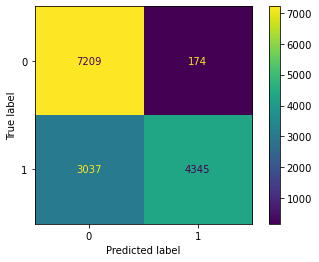

              precision    recall  f1-score   support

           0       0.94      0.60      0.73      7383
           1       0.71      0.96      0.82      7382

    accuracy                           0.78     14765
   macro avg       0.82      0.78      0.77     14765
weighted avg       0.82      0.78      0.77     14765



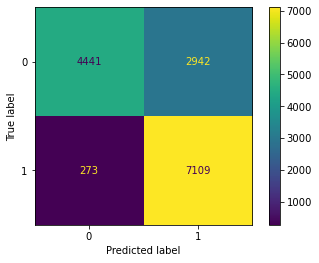

              precision    recall  f1-score   support

           0       0.70      0.96      0.81      7382
           1       0.94      0.59      0.73      7383

    accuracy                           0.78     14765
   macro avg       0.82      0.78      0.77     14765
weighted avg       0.82      0.78      0.77     14765



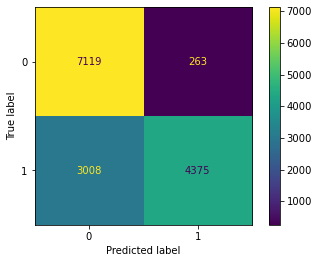

              precision    recall  f1-score   support

           0       0.94      0.61      0.74      7382
           1       0.71      0.96      0.82      7383

    accuracy                           0.78     14765
   macro avg       0.83      0.78      0.78     14765
weighted avg       0.83      0.78      0.78     14765



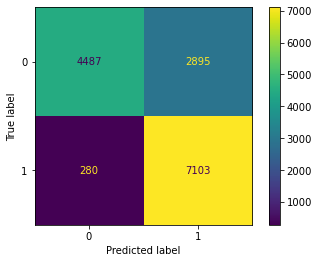

              precision    recall  f1-score   support

           0       0.70      0.98      0.82      7382
           1       0.96      0.59      0.73      7382

    accuracy                           0.78     14764
   macro avg       0.83      0.78      0.77     14764
weighted avg       0.83      0.78      0.77     14764



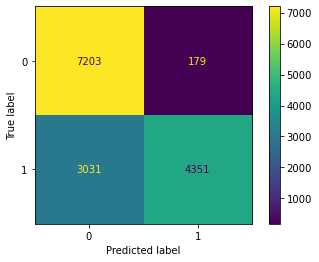

the f1-score in all iterations       : [0.73019074 0.81557965 0.72789285 0.81732927 0.73052384]
the mean of f1-scores                : 0.7643032702671236
the std  of f1-scores                : 0.042594497754575585


In [39]:
LG_clf = lgb.LGBMClassifier(random_state=0)
baseLine_mean,baseLine_std , baseLine_Score_Lst = apply_CV_F1(LG_clf,X_train_pca,y_train)

### Save the BaseLine model

In [41]:
# save the model to disk
import pickle
filename = 'BaseLine_model_10.pkl'
pickle.dump(BaseLine_model_10, open(filename, 'wb'))

In [42]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_pca, y_test)
print(result)

0.7827942132639792


-------------

In [15]:
f1_score = [0.73019074, 0.81557965 ,0.72789285, 0.81732927 ,0.73052384]

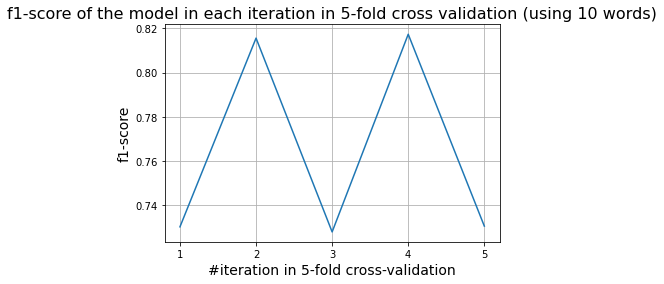

In [17]:
# Plotting the Graph
plt.plot(['1','2','3','4','5'], f1_score)
plt.title("f1-score of the model in each iteration in 5-fold cross validation (using 10 words)",fontsize=16)
plt.xlabel("#iteration in 5-fold cross-validation",fontsize=14)
plt.ylabel("f1-score",fontsize=14)
plt.grid()
plt.show()

## References 

[1] https://www.csmining.org/cdmc2021/index.php?id=5

[2] https://keras.io/api/applications/
    